## 5.1

In [2]:
!pip install graphviz

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn import tree
import graphviz

In [11]:
data = pd.read_csv('/kaggle/input/diabetes/diabetes.csv') 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
X = data.drop('Outcome', axis=1) 
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))   

Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Decision Tree:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       151
           1       0.58      0.71      0.64        80

    accuracy                           0.72       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.72      0.72       231



судя по метрикам регрессия лучше, классы не сбалансированы поэтому смотриим на взвешенные значения

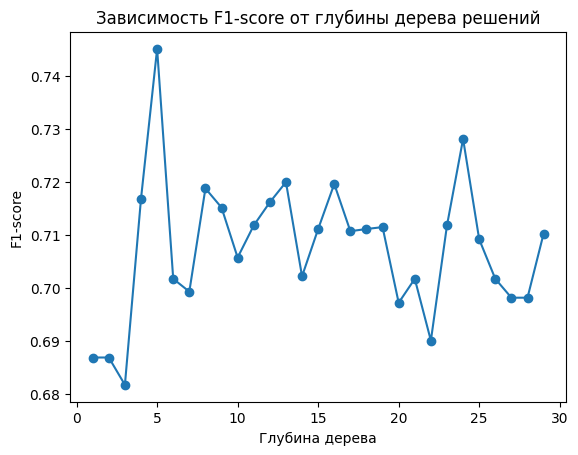

In [13]:
depths = range(1, 30)
scores = []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(f1_score(y_test, y_pred, average='weighted'))

plt.plot(depths, scores, marker='o')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от глубины дерева решений')
plt.show()

на глубине 5 достигается лучшее значение f1

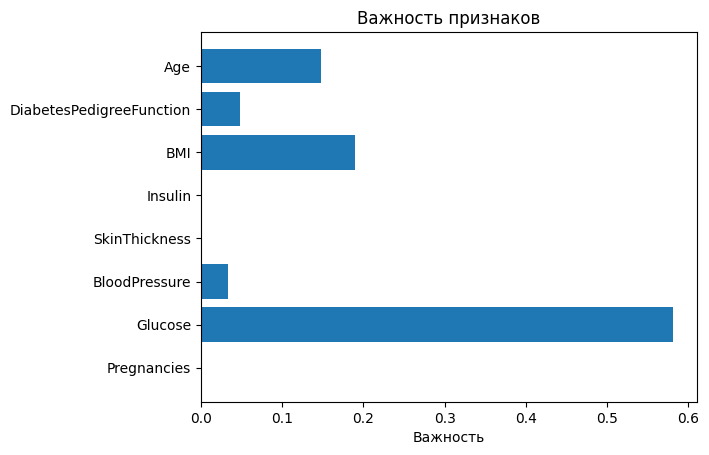

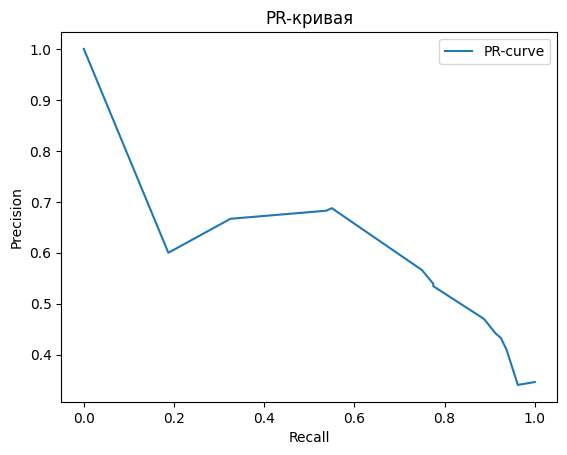

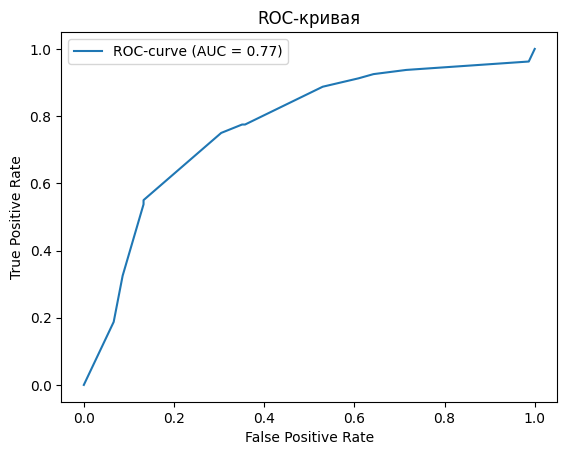

In [16]:
best_depth = depths[scores.index(max(scores))]
dt_best = DecisionTreeClassifier(max_depth=best_depth)
dt_best.fit(X_train, y_train)

dot_data = tree.export_graphviz(dt_best, out_file=None, 
                                feature_names=X.columns,  
                                class_names=[str(c) for c in set(y)],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("decision_tree") 

importances = dt_best.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel('Важность')
plt.title('Важность признаков')
plt.show()


y_score = dt_best.predict_proba(X_test)[:, 1] 
precision, recall, _ = precision_recall_curve(y_test, y_score)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(recall, precision, label='PR-curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая')
plt.legend()
plt.show()

plt.plot(fpr, tpr, label=f'ROC-curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()